# Homework 8 - Solving Systems of Linear Equations

## Exercise 1: Creating a Toeplitz Matrix with Diagonals from a List

Implement a function to create a Toeplitz matrix of size $n \times n$ where all elements on the diagonals are taken from a given list $[a_1, a_2, \dots, a_k]$, and the rest of the elements are zeros. The list length may be less than or equal to $n$.

1. **Write a Python Function:** Create a function named `gen_toeplitz` that accepts two parameters:
    - A list of elements $[a_1, a_2, \dots, a_k]$
    - The size of the desired square Toeplitz matrix $n$
2. **Return a Toeplitz Matrix:** The function should generate and return a Toeplitz matrix of size $n \times n$ where:
    - Each descending diagonal from left to right is filled with the elements from the given list
    - Elements not on these diagonals are set to zero
3. **Test the Function:** Test the function with a sample list of elements and a specified size $n$, then print the resulting Toeplitz matrix.

In [ ]:
import numpy as np

def gen_toeplitz(elements: list, n: int):

    toeplitz_matrix = np.zeros((n, n))

    for i, value in enumerate(elements):
        toeplitz_matrix += np.diag(np.ones(n - i) * value, k=i)
        if i != 0:
            toeplitz_matrix += np.diag(np.ones(n - i) * value, k=-i)
    return toeplitz_matrix

In [ ]:
elements = [1, 2, 3]
size = 5
toeplitz_matrix = gen_toeplitz(elements, size)
toeplitz_matrix

array([[1., 2., 3., 0., 0.],
       [2., 1., 2., 3., 0.],
       [3., 2., 1., 2., 3.],
       [0., 3., 2., 1., 2.],
       [0., 0., 3., 2., 1.]])

## Exercise 2: Applying Toeplitz Matrix on an Image

Read an image, convert it to grayscale, and apply a Toeplitz matrix transformation on it.

1. Read an image named `img.jpg` (choose any free image from https://unsplash.com/s/photos/flower) using PIL.
2. Convert the image to grayscale and represent it as a NumPy array.
3. Utilize the `gen_toeplitz` function with a list of elements of your choice (ensure the length matches one dimension of the grayscale image for simplicity) to create a Toeplitz matrix.
4. Multiply the grayscale image array by the Toeplitz matrix to create a distorted image.
5. Display the resulting image.
6. Use `np.linalg.solve` to recover the original image from the distorted image.

(3872, 3098)


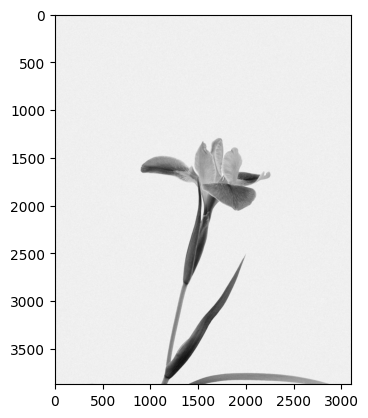

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("img.jpg").convert("L")
img_array = np.array(img)
print(img_array.shape)
plt.imshow(img_array, cmap="gray")
plt.show()

In [ ]:
elements = [1 - i / 100 for i in range(100)]
toeplitz_matrix = gen_toeplitz(elements, img_array.shape[0])

In [ ]:
distorted_img = toeplitz_matrix @ img_array

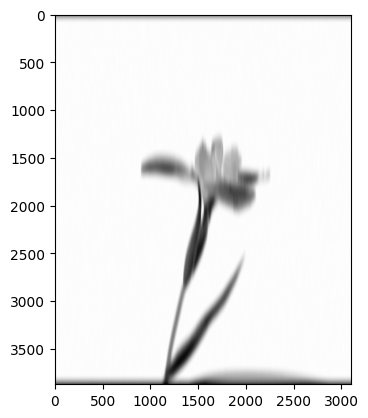

In [ ]:
plt.imshow(distorted_img, cmap="gray")
plt.show()

In [ ]:
recovered_img = np.linalg.solve(toeplitz_matrix, distorted_img)

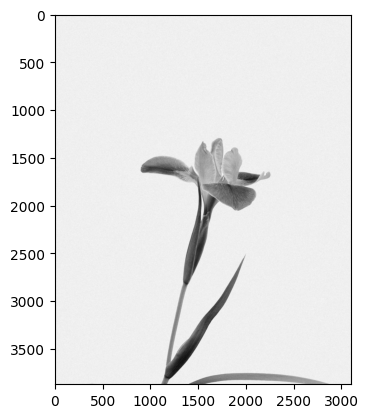

In [ ]:
plt.imshow(recovered_img, cmap="gray")
plt.show()

## Exercise 3: Experimenting the Complexity of Solving Systems of Equations

Conduct an experiment to illustrate the computational complexity of solving systems of linear equations using NumPy, visualizing this relationship through a log-log plot.

1. **Generate Systems of Equations:** Create square matrices $A$ of sizes ranging from $n = 100$ to $n = 5000$, in increments of $100$, with corresponding randomly generated constant vectors $b$.
2. **Measure Execution Time:** For each system, use NumPy's `numpy.linalg.solve` to solve for `x` in `Ax = b`. Measure and record the execution time.
3. **Record Data:** Keep track of each system's size $n$ and its computation time.
4. **Log-Log Plot:** Plot $\ln(n)$ against $\ln(time)$ to visualize the relationship between system size and computation time on a log-log scale. This helps in understanding how execution time scales with the size of the system.
5. **Analysis:** Examine the slope of the line in the log-log plot to discuss the computational complexity of solving systems of linear equations, which can provide insights into the $O(n^3)$ behavior of the algorithm.

In [ ]:
import time

start_size = 100
end_size = 5000
step_size = 100

sizes = range(start_size, end_size + 1, step_size)
times = []

for n in sizes:
    start_time = time.time()

    # Create n x n array of random numbers
    A = np.random.rand(n, n)

    # Create 1 x n array of random numbers
    b = np.random.rand(n)

    # Solve for x
    x = np.linalg.solve(A, b)

    end_time = time.time()
    times.append(end_time - start_time)

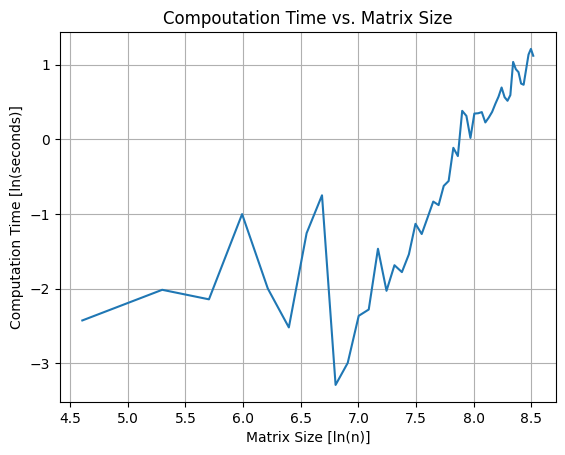

In [ ]:
log_sizes = np.log(sizes)
log_times = np.log(times)

plt.plot(log_sizes, log_times)
plt.title("Compoutation Time vs. Matrix Size")
plt.xlabel("Matrix Size [ln(n)]")
plt.ylabel("Computation Time [ln(seconds)]")
plt.grid(True)
plt.show()

### Complexity Analysis

Provide an explanation to demonstrate the theoretical result of execution time, which is $O(n^3)$, for solving a system of linear equations based on the output results provided above.

As we can see from the graph above, the time complexity of `np.linalg.solve` is approximately $O(n^3)$. To see this, let's consider 

$$ \ln(y) = \ln(n^3) $$

where $y$ is the computation time and $n$ is the matrix size. This simply reduces to

$$ \ln(y) = 3 \ln(n) $$

Looking at the segment of the graph where the $\ln(n)$ is between $7$ and $8$, we can see that computation time increases from approximately $-3$ to approximately $0$, showing that this relationship holds.

Intuitively, this result makes sense considering that solving the process of solving a system of linear equations using Gauss-Jordan elimination, in which an row operation, which affects $n + 1$ numbers, would would be required to modify each element of the $n \times n$ matrix $A$ to become either a $0$ or a $1$ in the worst-case scenario. We can simplify this result to show the $O(n^3)$ time complexity:

$$ n^2 (n + 1) = n^3 + n^2 \rightarrow O(n^3) $$